In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, auc
from keras.datasets import fashion_mnist
from keras.layers.core import Activation, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_labels = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

X_train = X_train.reshape(X_train.shape[0], 784) #Reshaping the training and test data
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

num_classes = 10 #Ten classes for each of the ten labels
num_epochs = 25
num_batch = 100

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
def train(X_train, y_train, num_classes, num_epochs, num_batch):
  Y_train = np_utils.to_categorical(y_train, num_classes) #Use one-hot encoding to convert 1-D arrays to 10-D matrices
  Y_test = np_utils.to_categorical(y_test, num_classes) 

  model = Sequential() #Define model type
  model.add(Dense(500, input_shape=(784,))) #Define the input layer and its size and shape                                  
  model.add(Activation('sigmoid')) #Input layer activation function
  model.add(Dropout(0.19))
  model.add(Dense(500)) #Define the hidden layer
  model.add(Activation('tanh'))
  model.add(Dropout(0.19))
  model.add(Dense(num_classes)) #Define the output layer
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile the model using the categorial cross entropy cost function and Adam optimizer
  filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5" #Saves the model after every epoch
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
  
  history = model.fit(X_train, Y_train, batch_size= num_batch, epochs= num_epochs, verbose=1, validation_data=(X_test,Y_test))
  return history, Y_test, Y_train, model
history, Y_test, Y_train, model = train(X_train, y_train, num_classes, num_epochs, num_batch)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/25





60000/60000 [==============================] - 7s 111us/step - loss: 0.5831 - acc: 0.7859 - val_loss: 0.4977 - val_acc: 0.8198
Epoch 2/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.4286 - acc: 0.8443 - val_loss: 0.4430 - val_acc: 0.8362
Epoch 3/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.3842 - acc: 0.8603 - val_loss: 0.3824 - val_acc: 0.8631
Epoch 4/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.3635 - acc: 0.8664 - val_loss: 0.3915 - val_acc: 0.8579
Epoch 5/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.3426 - acc: 0.8752 - val_loss: 0.3669 - val_acc: 0.8687
Epoch 6/25
60000/60000 [=================

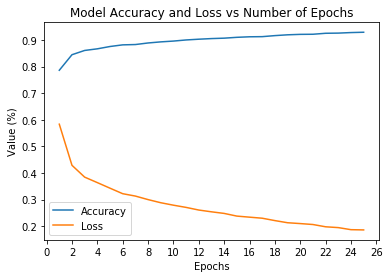

In [4]:

plt.plot(range(1,1+len(history.history['acc'])), history.history['acc'])
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.title('Model Accuracy and Loss vs Number of Epochs')
plt.ylabel('Value (%)')
plt.xlabel('Epochs')
plt.legend(['Accuracy','Loss'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()


Model Accuracy: 0.8946000027656555
Class labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 6, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 9,

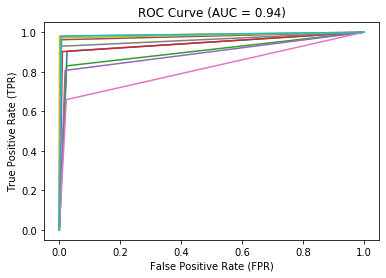

In [5]:
def test(history, X_test, Y_test, model):
  model_acc = max(history.history['val_acc'])#changed to accuracy
  
  Y_test_Int_array = []
  for i in range(len(Y_test)):
    Y_test_Int_array.append(np.argmax(Y_test[i]))
  y_pred = model.predict_classes(X_test)

  target_names = [class_labels[x] for x in range(0,10)]
  matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
  matrix.index.name = 'Predicted'
  matrix.columns.name = 'Actual'

  return model_acc, Y_test_Int_array, matrix, y_pred
model_acc, Y_test_Int_array, matrix, y_pred = test(history, X_test, Y_test, model)

#Function to allow support for multi-class ROC Curve and AUC
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

Y_pred = np_utils.to_categorical(y_pred, num_classes) 
fpr, tpr= dict(), dict()
roc_auc = dict()

#Model performance and results
print('Model Accuracy:', model_acc)
print('Class labels:', Y_test_Int_array)

#Evaluation Metrics
ACC = accuracy_score(y_test, y_pred)
PPV = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
aucscore = multiclass_roc_auc_score(y_test, y_pred, average="macro")

#ROC Curve of 10 classes
for i in range(num_classes):
  fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], Y_pred[:,i])
  roc_auc[i] = roc_auc_score(Y_test[i], Y_pred[i])
  plt.plot(fpr[i], tpr[i])
  
plt.xlabel('False Positive Rate (FPR)');
plt.ylabel('True Positive Rate (TPR)');
plt.title('ROC Curve (AUC = {0:0.2f}'.format(aucscore)+')');

#Confusion Matrix
print('Classification Accuracy (ACC): {0:0.1f}'.format(ACC*100) + '%')
print('Precision or PPV: {0:0.1f}'.format(PPV*100) + '%')
print('Recall or TPR: {0:0.1f}'.format(Recall*100) + '%')
print("Area Under Curve (AUC):", aucscore)
matrix

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 